# HPC GRAB-DA Shock Response

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sys
# change pkg_path variable to the directory storing the package
sys.path.insert(0, '../utility_code')
import fp_dat, fp_viz
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sci


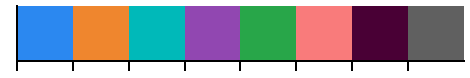

In [2]:
fp_viz.plot_style()
npg_pal = ['#2b88f0', '#EF862E', '#00B9B9', '#9147B1',
           '#28A649', '#F97B7B', '#490035', '#606060']
fp_viz.set_palette(color_pal=['#2b88f0', '#EF862E', '#00B9B9',
                   '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060'], show=True)


In [3]:
df_train_trials = pd.read_csv(
    './data-clean/HPC_GRAB-DA_Shock_Response.csv')


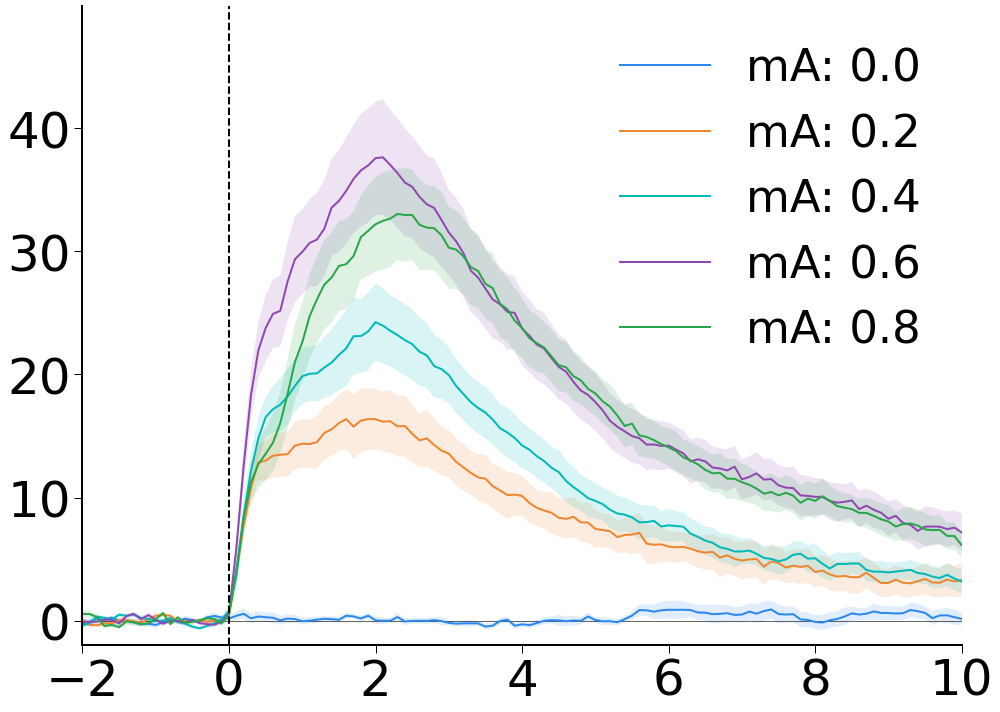

In [4]:
fig, ax = plt.subplots(figsize=(14, 10))
fp_viz.tfc_trial_avg(df_train_trials, hue='mA',
                     yvar='dFF_baseline_norm', ax=ax, cs_dur=0, us_dur=0)
plt.xlim(-2, 10)

plt.ylim(-2, 49.9)
plt.axvline(x=0, color='k', linestyle='--', linewidth=2)
plt.legend(fontsize=45, loc='upper right')
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [5]:
# For quantification, get single value for pre and post shock

event = 'shock'
t_pre = (-2, 0)
t_post = (0, 2)


df_pre = df_train_trials[df_train_trials['time_trial'].between(
    t_pre[0], t_pre[1])].reset_index(drop=True)
df_post = df_train_trials[df_train_trials['time_trial'].between(
    t_post[0], t_post[1])].reset_index(drop=True)

# add `epoch` column
df_pre['epoch'] = f'pre-{event}'
df_post['epoch'] = f'post-{event}'

# recombine values and groupby new epoch var
df_prepost = pd.concat([df_pre, df_post])

# get the mean dFF for each animal at every time point in the epoch (pre or post shock)
df_prepost = df_prepost.groupby(
    ['Animal', 'time_trial', 'epoch', 'mA']).mean().reset_index()

# get the max (peak) of the average dFF during each epoch
df_prepost = df_prepost.groupby(['Animal', 'epoch', 'mA']).max().reset_index()


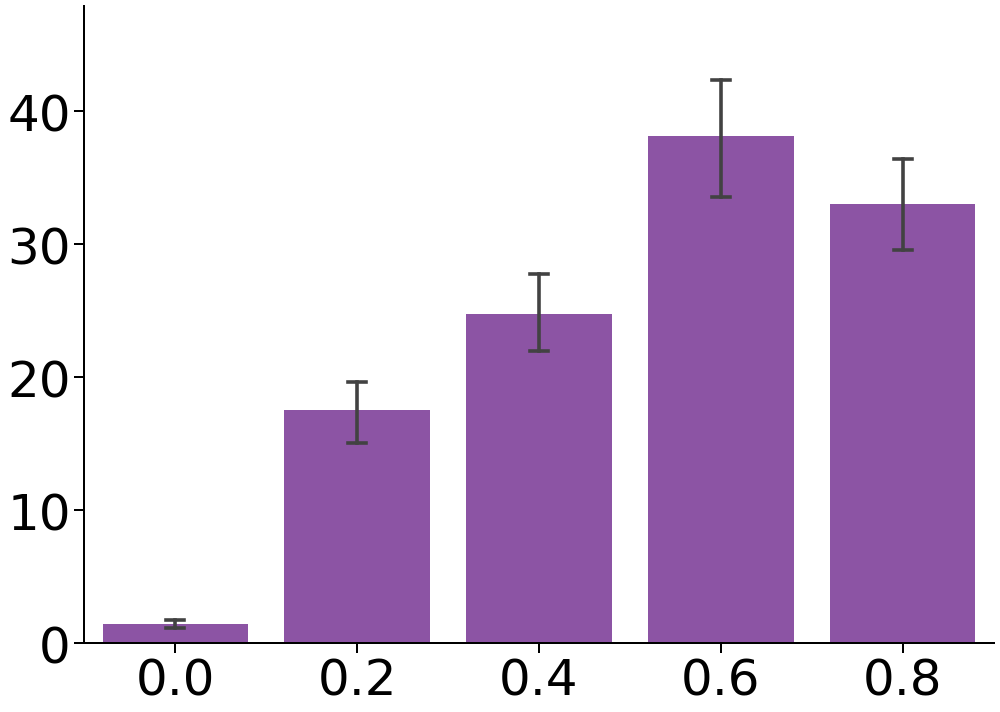

In [6]:
fig, ax = plt.subplots(figsize=(14, 10))

p = sns.barplot(x='mA', y='dFF_baseline_norm',
                ci=68, capsize=0.1,
                data=df_prepost.query('epoch == "post-shock" '), color='#9147B1')

ax.set_ylabel('')

ax.set_ylim(0, 47.9)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel('')
plt.tight_layout()

In [7]:
df_quant = df_prepost.query('epoch == "post-shock"')


In [8]:
import pingouin as pg
pg.rm_anova(data=df_quant, dv='dFF_baseline_norm', within='mA', subject='Animal')


,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,mA,4,36,42.38644,3.811097e-13,4.185387e-07,0.824857,0.461915,False,0.093467,0.044969


/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
